## imports

In [4]:
import pickle
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
import cv2
import random

## load dataset

In [5]:
def load_dataset():
  image_pickle_file_path = 'images.pkl'
  label_pickle_file_path = 'label.pkl'

  with open(image_pickle_file_path, 'rb') as file:
    images = pickle.load(file)

  with open(label_pickle_file_path, 'rb') as file:
    labels = pickle.load(file)

  # images = images.reshape(images.shape[0], -1)

  return images, labels

In [6]:
images, labels = load_dataset()
images = images[200:202]
# # Choose a random index along the first axis
# random_indices = np.random.choice(560, size=30, replace=False)
# # Extract the randomly selected values
# random_values = images[random_indices]


## Proccess on images
- Extract features
- normalize features
- make features a single dimnetion vector

In [7]:
def extract_features(images):
    features = []
    original_features = []

    # For each image in the dataset
    for img in images:

        # Reshape the image back to a 2D array
        # img_hsv = img_hsv.reshape((height, width, 3))
        height, width, _ = img.shape
        img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

        # For each pixel in the image
        for i in range(img_hsv.shape[0]):
            for j in range(img_hsv.shape[1]):
                pixel = img_hsv[i, j]
                h, s, v = pixel
                x, y = i, j

                original_features.append((h,s,v,x,y))

                h_weight = 10
                s_weight = 1
                v_weight = 1
                x_weight = 0.1
                y_weight = 0.1
                h, s, v = h * h_weight, s * s_weight, v * v_weight
                x, y = x * x_weight, y * y_weight

                features.append((h, s, v, x, y))

    return features, original_features

In [8]:
def normalize_features(features):
    features_array = np.array(features)
    scaler = StandardScaler()
    normalized_features_array = scaler.fit_transform(features_array)
    normalized_features = normalized_features_array.tolist()
    return normalized_features

In [9]:
def process_images_in_chunks(images, chunk_size):
    features = []
    original_features = []
    num_images = len(images)

    for i in range(0, num_images, chunk_size):
        # Extract features for a chunk of images
        chunk_features, chunk_original_features = extract_features(images[i:i+chunk_size])

        # Append the features to the overall features list
        features.extend(chunk_features)
        original_features.extend(chunk_original_features)

        print('<<', i, '>>')

    return features, original_features


In [10]:
# extract features
chunk_size = 10
features, original_features = process_images_in_chunks(images, chunk_size)

<< 0 >>


In [11]:
# normalize features
features = normalize_features(features)

## clustering

### k-means

In [12]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(features)
clusters = clusters.reshape(images.shape[0], images.shape[1], images.shape[2])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### db-scan

In [13]:
# dbscan = DBSCAN(eps=50, min_samples=5)
# clusters = dbscan.fit_predict(features)
# clusters = clusters.reshape(images.shape[0], images.shape[1], images.shape[2])

### db-scann

In [14]:
# import numpy as np
# from sklearn.cluster import DBSCAN

# # Apply DBSCAN with parallelization
# db = DBSCAN(eps=0.5, min_samples=10).fit(features)
# labels = db.labels_

# # Number of clusters in labels,a ignoring noise if present.
# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# n_noise_ = list(labels).count(-1)

# print("Estimated number of clusters: %d" % n_clusters_)
# print("Estimated number of noise points: %d" % n_noise_)

### mean-shift

In [15]:
# import numpy as np
# from sklearn.cluster import MeanShift, estimate_bandwidth

# # Estimate bandwidth (this can be adjusted based on your data)
# bandwidth = estimate_bandwidth(features, quantile=0.2, n_samples=500)

# # Apply Mean Shift
# ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
# ms.fit(features)

# # Access cluster labels and cluster centers
# labels = ms.labels_
# cluster_centers = ms.cluster_centers_

# # Number of clusters
# n_clusters_ = len(np.unique(labels))

# print("Estimated number of clusters: %d" % n_clusters_)
# print("Estimated number of noise points: %d" % n_noise_)


## Plot

#### 3D

In [16]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D  # Importing the 3D plotting toolkit

# # Example data (replace this with your actual data)
# vectors = np.array(original_features)
# cluster_labels = clusters.reshape(clusters.shape[0]*clusters.shape[1]*clusters.shape[2])

# # Create a 3D plot
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # Plot vectors with different colors based on their clusters
# for cluster_label in np.unique(cluster_labels):
#     mask = (cluster_labels == cluster_label)
#     ax.scatter(vectors[mask, 3], vectors[mask, 4], vectors[mask, 2], label=f'Cluster {cluster_label}')

# # Set labels
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')

# # Add a legend
# ax.legend()

# # Show the 3D plot
# plt.show()


#### 2D

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


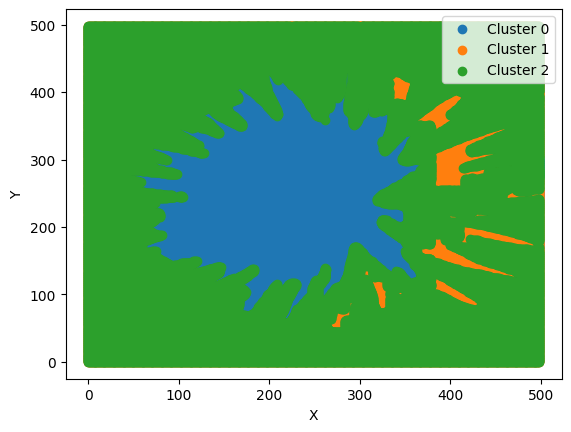

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace this with your actual data)
vectors = np.array(original_features)
cluster_labels = clusters.reshape(clusters.shape[0]*clusters.shape[1]*clusters.shape[2])

# Plot vectors with different colors based on their clusters
for cluster_label in np.unique(cluster_labels):
    mask = (cluster_labels == cluster_label)
    plt.scatter(vectors[mask, 3], vectors[mask, 4], label=f'Cluster {cluster_label}')

# Set labels
plt.xlabel('X')
plt.ylabel('Y')

# Add a legend
plt.legend()

# Show the plot
plt.show()


### plot db-scan

In [18]:
# # @title Default title text
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler

# featuress = StandardScaler().fit_transform(features)

# unique_labels = set(labels)
# core_samples_mask = np.zeros_like(labels, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True

# colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
# for k, col in zip(unique_labels, colors):
#     if k == -1:
#         # Black used for noise.
#         col = [0, 0, 0, 1]

#     class_member_mask = labels == k

#     xy = featuress[class_member_mask & core_samples_mask]
#     plt.plot(
#         xy[:, 0],
#         xy[:, 1],
#         ".",
#         markerfacecolor=tuple(col),
#         markeredgecolor="k",
#         markersize=14,
#     )

#     xy = featuress[class_member_mask & ~core_samples_mask]
#     plt.plot(
#         xy[:, 0],
#         xy[:, 1],
#         "o",
#         markerfacecolor=tuple(col),
#         markeredgecolor="k",
#         markersize=6,
#     )

# plt.title(f"Estimated number of clusters: {n_clusters_}")
# plt.show()

### plot mean-shift

In [19]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from itertools import cycle
# import numpy as np

# def plot_mean_shift_clusters_3d(features, labels, cluster_centers):
#     # Number of clusters
#     n_clusters = len(cluster_centers)

#     # Define colors for plotting
#     colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')

#     fig = plt.figure(figsize=(12, 8))
#     ax = fig.add_subplot(111, projection='3d')

#     for k, col in zip(range(n_clusters), colors):
#         cluster_points = np.array(features)[labels == k]
#         ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], c=col, marker='.', s=50, edgecolors='k')

#         # Mark the cluster center
#         cluster_center = cluster_centers[k]
#         ax.scatter(cluster_center[0], cluster_center[1], cluster_center[2], c=col, marker='x', s=200, edgecolors='k')

#     ax.set_title('Mean Shift Clustering (3D)')
#     ax.set_xlabel('Feature 1')
#     ax.set_ylabel('Feature 2')
#     ax.set_zlabel('Feature 3')

#     plt.show()

# # Example usage:
# # Assuming you have a 5D feature array, replace it with your actual feature array
# # Replace 'features', 'labels', and 'cluster_centers' with your actual variable names
# plot_mean_shift_clusters_3d(features, labels, cluster_centers)


## extracting clusters features for each image sepratedly

### mean color for each cluster in each image

In [20]:
import numpy as np

def calculate_mean(first_array, second_array):
    
    mean_values = []
    unique_elements = np.unique(first_array)
        
    for element in unique_elements:
        indices = np.where(first_array == element)
        mean_hsv = np.mean(second_array[indices], axis=0)
        mean_values.append(mean_hsv.tolist())

    return mean_values

In [21]:
mean_color_each_cluster_each_image = []
for i in range(images.shape[0]):
    mean_values = calculate_mean(clusters[i], images[i])
    mean_color_each_cluster_each_image.append(np.array(mean_values))

mean_color_each_cluster_each_image = np.array(mean_color_each_cluster_each_image)
mean_color_each_cluster_each_image

array([[[ 20.4712128 , 140.42030656, 184.98467219],
        [  3.59947819,   3.65825714,   3.72153606],
        [  8.81281535,  17.68428267,  22.186543  ]],

       [[ 26.53177999, 190.98294954, 216.32738339],
        [ 57.02395833,  66.13125   ,  73.65208333],
        [ 32.65517991,  70.40185276,  59.9958755 ]]])

### variance color for each cluster in each image

In [22]:
import numpy as np

def calculate_variance(first_array, second_array):
    
    variance_values = []
    unique_elements = np.unique(first_array)
    
    for element in unique_elements:
        indices = np.where(first_array == element)
        var_hsv = np.var(second_array[indices], axis=0)
        variance_values.append(var_hsv.tolist())

    return variance_values


In [ ]:
var_color_each_cluster_each_image = []
for i in range(images.shape[0]):
    var_values = calculate_variance(clusters[i], images[i])
    var_color_each_cluster_each_image.append(np.array(var_values))

var_color_each_cluster_each_image = np.array(var_color_each_cluster_each_image)
var_color_each_cluster_each_image

### size of clusters in each image

In [ ]:
def calculate_size(clusters):
    size_each_cluster_each_image = []

    for i in range(clusters.shape[0]):
        unique_clusters, counts = np.unique(clusters[i], return_counts=True)
        each_clusters_size = counts
        size_each_cluster_each_image.append(each_clusters_size)

    size_each_cluster_each_image = np.array(size_each_cluster_each_image)
    return size_each_cluster_each_image

In [ ]:
size_each_cluster_each_image = calculate_size(clusters)
size_each_cluster_each_image

## extracting clusters features totally

### mean color of clusters totally

In [ ]:
# Calculate the mean color for each cluster
def cluster_mean_value(kmeans, clusters):
    cluster_means = []
    for cluster in range(kmeans.n_clusters):
        mask = (clusters == cluster)
        cluster_mean = np.mean(images * mask[:, :, :, np.newaxis], axis=(0, 1, 2)) / np.mean(mask)
        cluster_means.append(cluster_mean)

    # Convert the mean colors to integer values
    cluster_means = np.round(cluster_means).astype(int)
    return cluster_means

In [ ]:
clusters_mean = cluster_mean_value(kmeans, clusters)
# clusters_mean.reshape(clusters_mean.shape[0]*clusters_mean.shape[1])

### variance color of clusters

In [ ]:
def cluster_variance_value(kmeans, clusters):
    cluster_variances = []
    for cluster in range(kmeans.n_clusters):
        mask = (clusters == cluster)
        cluster_pixels = images[mask]

        # Calculate the variance along each channel
        cluster_variance = np.var(cluster_pixels, axis=0)

        cluster_variances.append(cluster_variance)

    # Convert the variance colors to integer values
    cluster_variances = np.round(cluster_variances).astype(int)
    return cluster_variances

In [ ]:
clusters_variance = cluster_variance_value(kmeans, clusters)
clusters_variance

### size of clusters

In [ ]:
def cluster_size(clusters):
    clusters_array = np.array(clusters)
    unique_clusters, counts = np.unique(clusters_array, return_counts=True)
    return counts


In [ ]:
clusters_size = cluster_size(clusters)
clusters_size

### area of clusters

In [ ]:
def clusters_areas(original_features):
    # Create an array to store the x and y coordinates for each cluster
    cluster_coordinates = np.zeros((len(np.unique(clusters)), 4))
    reshaped_clusters = clusters.reshape(clusters.shape[0]*clusters.shape[1]*clusters.shape[2])
    # Iterate over each cluster
    for cluster_label in np.unique(reshaped_clusters):
        # Get indices of pixels in the current cluster
        indices = np.where(reshaped_clusters == cluster_label)
        indices = np.array(indices)
        indices = indices.reshape(indices.shape[1])
        # indices = indices.tolist()
        x_coordinates=list()
        y_coordinates=list()
        # Extract x and y coordinates
        for i in indices:
            x_coordinates.append(original_features[i][3])
            y_coordinates.append(original_features[i][4])

        # Calculate minimum and maximum x and y coordinates
        min_x, max_x = np.min(x_coordinates), np.max(x_coordinates)
        min_y, max_y = np.min(y_coordinates), np.max(y_coordinates)

        # Calculate width and height
        width = max_x - min_x
        height = max_y - min_y

        # Store the results in the cluster_coordinates array
        cluster_coordinates[cluster_label] = [min_x, min_y, width, height]

    # Calculate the area for each cluster
    cluster_area = cluster_coordinates[:, 2] * cluster_coordinates[:, 3]
    return cluster_area


In [ ]:
clusters_area = clusters_areas(original_features)
clusters_area

## display clustering

In [ ]:
def display_clusters(cluster_means):
    # Display images with cluster colors
    for i, image in enumerate(images[:10]):
        cv2.imshow('Original', images[i])

        # Create a blank image for displaying clustered colors
        cluster_image = np.zeros_like(image)

        # Assign the mean color to each pixel based on the cluster assignment
        for cluster, mean_color in enumerate(cluster_means):
            mask = (clusters[i] == cluster)
            cluster_image[mask] = mean_color

        cv2.imshow('Clustered', cluster_image)
        cv2.waitKey(0)

    cv2.destroyAllWindows()

display_clusters(clusters_mean)

## create clusters feature vectors 💢

In [ ]:
# todo
# def create_clusters_vector(clusters_mean, clusters_variance, clusters_size, clusters_area):

#     result = []
#     for mean, variance, size, area in zip(clusters_mean, clusters_variance, clusters_size, clusters_area):
#         combined_row = [mean.tolist(), variance.tolist(), size, area]

#         result.append(combined_row)

#     return result

In [ ]:
def flatten_nested_list(nested_list):
    return [[item for sublist in lst for item in (sublist if isinstance(sublist, list) else [sublist])] for lst in nested_list]

In [ ]:
clusters_features = create_clusters_vector(clusters_mean, clusters_variance, clusters_size, clusters_area)
clusters_features = flatten_nested_list(clusters_features)
clusters_features

## clustering clusters 💢

In [ ]:
# kmeans_2 = KMeans(n_clusters=3)
# clusters_2 = kmeans.fit_predict(clusters_features)
# clusters_2

## Diaplay clustered cluster 💢